# Appendix B - Visualisation

We shall review a number of plots of our data, which can help us build our intuition on data manipulation and model selection.

R's ggplot2 is a powerful data visualisation package, yet highly accessible. We will be using rpy2 to interact with R, and plot our data set from the Kaggle Titanic problem using ggplot2 in an IPython notebook. You would need to have both rpy2 and R (3.0 recommended) installed.

http://rpy.sourceforge.net/

In [3]:
import pandas as pd
from scipy.stats import mode

df = pd.read_csv('../data/train.csv')

In [4]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

mode_embarked = mode(df['Embarked'])[0][0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

TypeError: unorderable types: float() > str()

We create 'bins' for the columns Age and Fare to help with later plots.

In [5]:
df['Ages'] = df['Age'].map(lambda x: int(x/10)*10)
df['Fares'] = df['Fare'].map(lambda x: int(x/10)*10)

In [6]:
%reload_ext rpy2.ipython

ImportError: No module named 'rpy2'

In [5]:
%Rpush df

In [6]:
%%R
library(ggplot2)

First, we review the number of passengers by the column Survived, which indicates whether or not they survived.

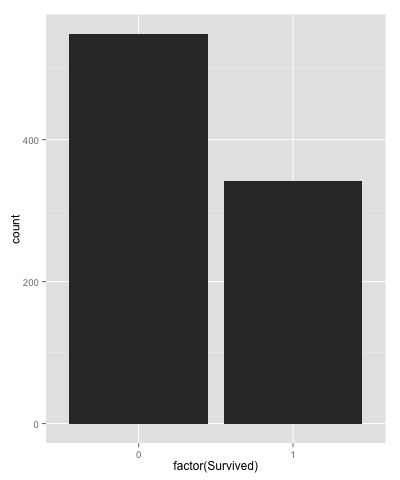

In [7]:
%%R -w 400
qplot(factor(Survived), data=df, geom="bar")

We now view a breakdown of the data by the column Sex, and rescale so that the breakdown appears as a percentage.

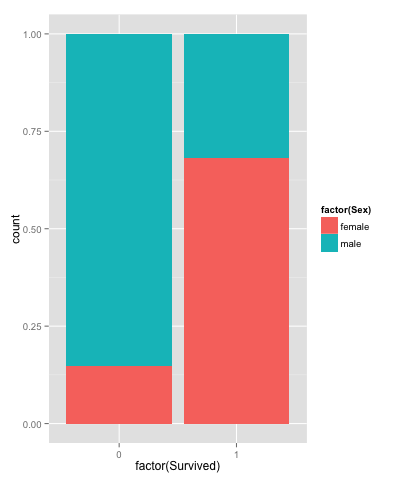

In [8]:
%%R -w 400
qplot(factor(Survived), data=df, fill=factor(Sex), geom="bar", position="fill")
#qplot(factor(Survived), data=df, fill=factor(Pclass), geom="bar", position="fill")
#qplot(factor(Survived), data=df, fill=factor(Ages), geom="bar", position="fill")

Next, we make a scatter plot between the columns Age and Survived. Note that the column Survived has categorical values, and is represented as factor(Survived).

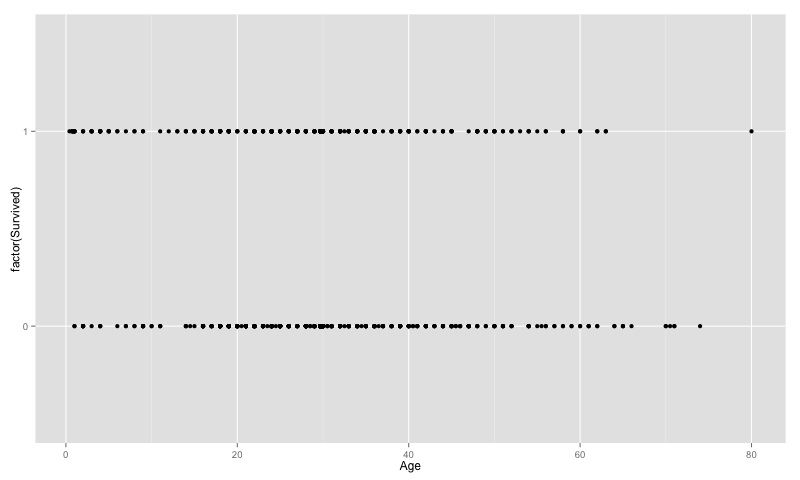

In [9]:
%%R -w 800
qplot(Age, factor(Survived), data=df)

We improve our plot by adjusting the shade of each point, such that the point is lighter if the passenger is older. 

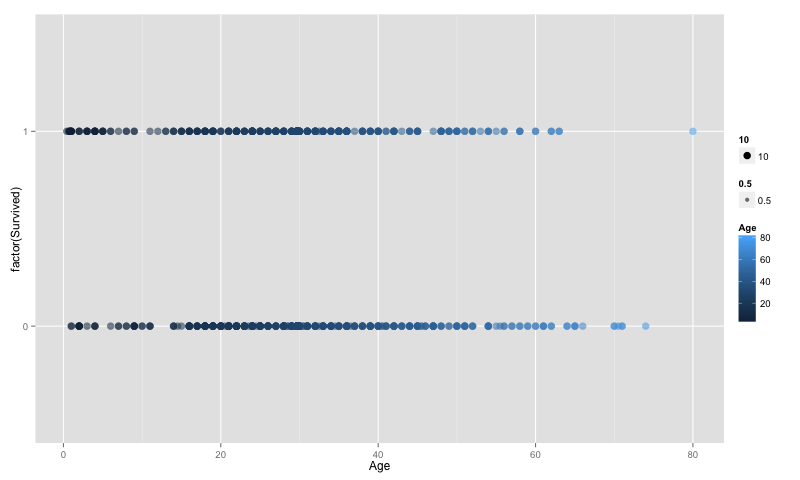

In [10]:
%%R -w 800
qplot(Age, factor(Survived), data=df, color=Age, size=10, alpha=0.5)
#qplot(Age, factor(Survived), data=df, color=Age, size=Age, alpha=0.5)

We plot the passengers by their passenger class.

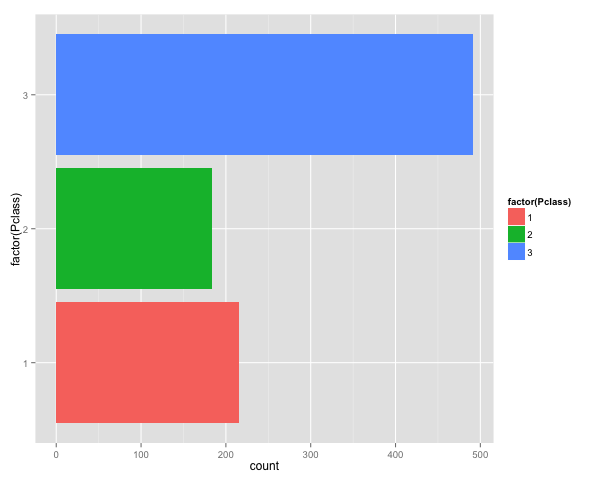

In [11]:
%%R -w 600
qplot(factor(Pclass), data=df, fill=factor(Pclass), geom="bar") + coord_flip()

We improve this plot by breaking down each bar by their departure point.

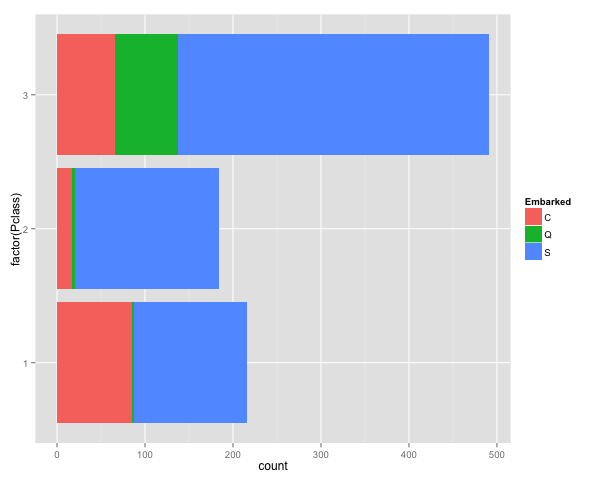

In [12]:
%%R -w 600
qplot(factor(Pclass), data=df, fill=Embarked, geom="bar") + coord_flip()

Finally, we review the column Age in a histogram.

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


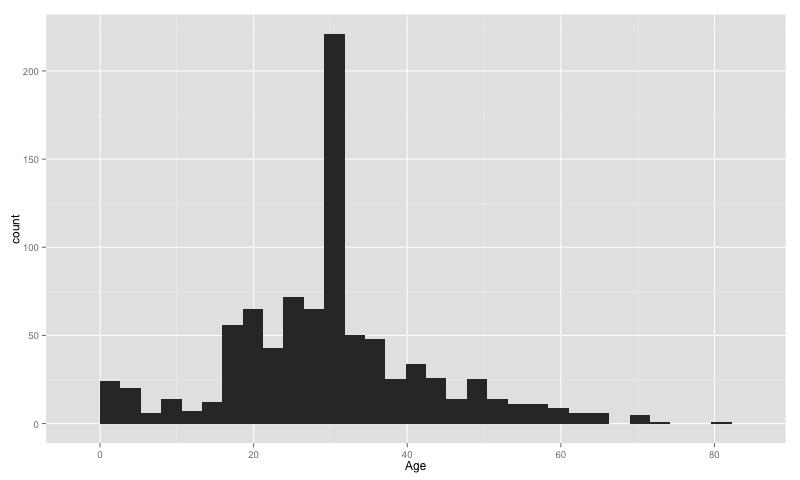

In [13]:
%%R -w 800
qplot(Age, data=df, geom="histogram")

We then review the fare distribution by each age range.

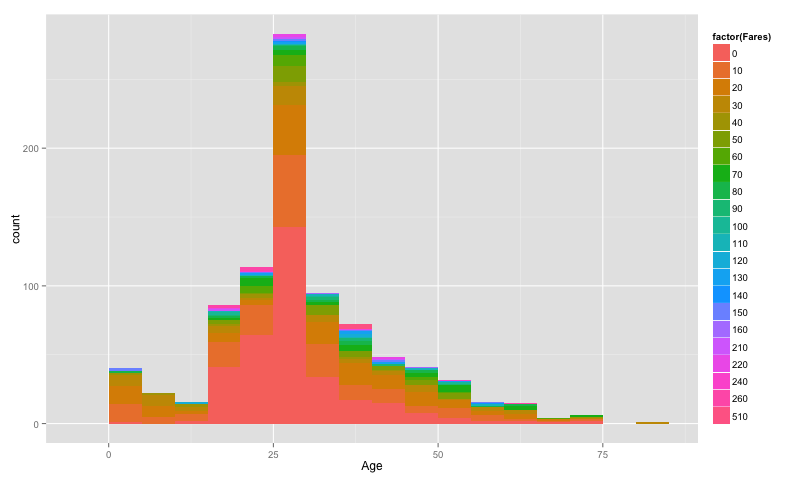

In [14]:
%%R -w 800
qplot(Age, data=df, fill=factor(Fares), geom="histogram", binwidth=5)